In [0]:
!wget https://github.com/shubham0204/Dataset_Archives/blob/master/face_landmarks_cleaned.zip?raw=true -O data.zip
!unzip data.zip

--2020-04-14 16:18:34--  https://github.com/shubham0204/Dataset_Archives/blob/master/face_landmarks_cleaned.zip?raw=true
Resolving github.com (github.com)... 52.74.223.119
Connecting to github.com (github.com)|52.74.223.119|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/shubham0204/Dataset_Archives/raw/master/face_landmarks_cleaned.zip [following]
--2020-04-14 16:18:35--  https://github.com/shubham0204/Dataset_Archives/raw/master/face_landmarks_cleaned.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shubham0204/Dataset_Archives/master/face_landmarks_cleaned.zip [following]
--2020-04-14 16:18:35--  https://raw.githubusercontent.com/shubham0204/Dataset_Archives/master/face_landmarks_cleaned.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercon

In [0]:
import numpy as np
import tensorflow as tf

In [0]:
x_train = np.load( "face_landmarks_cleaned/x_train.npy" ) / 255
y_train = np.load( "face_landmarks_cleaned/y_train.npy" ) / 96
x_test = np.load( "face_landmarks_cleaned/x_test.npy" ) / 255
y_test = np.load( "face_landmarks_cleaned/y_test.npy" ) / 96

y_train = np.reshape( y_train , ( -1 , 1 , 1 , 30 ))
y_test = np.reshape( y_test , ( -1 , 1 , 1 , 30 ))

In [0]:
x_train.shape

(1498, 96, 96, 1)

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D( 256 , input_shape=( 96 , 96 , 1 ) , kernel_size=( 3 , 3 ) , strides=2 , activation='relu' ))
model.add(tf.keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=2 , activation='relu' ))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D( 30 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(tf.keras.layers.Conv2D( 30 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(tf.keras.layers.Conv2D( 30 , kernel_size=( 3 , 3 ) , strides=1 ))
model.compile( loss=tf.keras.losses.mean_squared_error , optimizer=tf.keras.optimizers.Adam( lr=0.0001 ) , metrics=[ 'mse' ] )

In [0]:
model.fit(x_train,y_train,batch_size=250,epochs=50)

Epoch 1/50
6/6 [==============================] - 5s 758ms/step - loss: 0.3684 - mse: 0.3685
Epoch 2/50
6/6 [==============================] - 1s 223ms/step - loss: 0.2372 - mse: 0.2373
Epoch 3/50
6/6 [==============================] - 1s 222ms/step - loss: 0.1626 - mse: 0.1627
Epoch 4/50
6/6 [==============================] - 1s 222ms/step - loss: 0.1144 - mse: 0.1145
Epoch 5/50
6/6 [==============================] - 1s 221ms/step - loss: 0.0815 - mse: 0.0815
Epoch 6/50
6/6 [==============================] - 1s 222ms/step - loss: 0.0599 - mse: 0.0599
Epoch 7/50
6/6 [==============================] - 1s 223ms/step - loss: 0.0457 - mse: 0.0457
Epoch 8/50
6/6 [==============================] - 1s 223ms/step - loss: 0.0364 - mse: 0.0364
Epoch 9/50
6/6 [==============================] - 1s 225ms/step - loss: 0.0300 - mse: 0.0300
Epoch 10/50
6/6 [==============================] - 1s 227ms/step - loss: 0.0255 - mse: 0.0255
Epoch 11/50
6/6 [==============================] - 1s 227ms/step - lo

In [0]:
model.save_weights('facial_landmarks.h5')
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

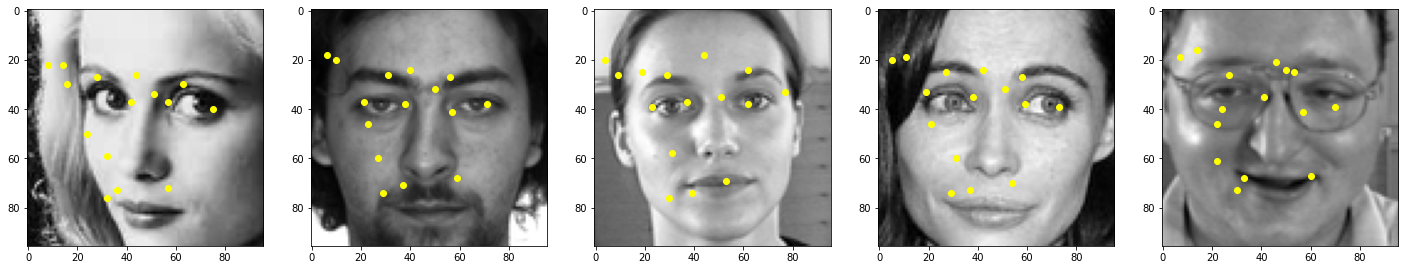

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=( 50 , 50 ))

for i in range( 1 , 6 ):
    j = 150 + i
    sample_image = np.reshape( x_test[j] * 255  , ( 96 , 96 ) ).astype( np.uint8 )
    pred = model.predict( x_test[ j : j +1  ] ) * 96
    pred = pred.astype( np.int32 )
    pred = np.reshape( pred[0 , 0 , 0 ] , ( 15 , 2 ) )
    fig.add_subplot( 1 , 10 , i )
    plt.imshow( sample_image.T , cmap='gray' )
    plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='yellow' )
    
plt.show()